In [156]:
# Importing libraries
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
from scipy.special import boxcox1p

In [157]:
# Loading dataset
!wget -O teleCust1000t.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv

--2020-08-15 09:47:21--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37048 (36K) [text/csv]
Saving to: ‘teleCust1000t.csv’

100%[======================================>] 37,048      --.-K/s   in 0.07s   

2020-08-15 09:47:22 (486 KB/s) - ‘teleCust1000t.csv’ saved [37048/37048]



In [158]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [159]:
df.shape

(1000, 12)

In [160]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
region     1000 non-null int64
tenure     1000 non-null int64
age        1000 non-null int64
marital    1000 non-null int64
address    1000 non-null int64
income     1000 non-null float64
ed         1000 non-null int64
employ     1000 non-null int64
retire     1000 non-null float64
gender     1000 non-null int64
reside     1000 non-null int64
custcat    1000 non-null int64
dtypes: float64(2), int64(10)
memory usage: 93.8 KB


In [161]:
df ['region'] = df ['region'].astype ('O')
df ['marital'] = df ['marital'].astype ('O')
df ['ed'] = df ['ed'].astype ('O')
df ['retire'] = df ['retire'].astype ('O')
df ['reside'] = df ['reside'].astype ('O')
df ['gender'] = df ['gender'].astype ('O')

In [162]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
region     1000 non-null object
tenure     1000 non-null int64
age        1000 non-null int64
marital    1000 non-null object
address    1000 non-null int64
income     1000 non-null float64
ed         1000 non-null object
employ     1000 non-null int64
retire     1000 non-null object
gender     1000 non-null object
reside     1000 non-null object
custcat    1000 non-null int64
dtypes: float64(1), int64(5), object(6)
memory usage: 93.8+ KB


### EDA

In [163]:
Desc = round (df.describe (),2)
Desc

,tenure,age,address,income,employ,custcat
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,35.53,41.68,11.55,77.54,10.99,2.49
std,21.36,12.56,10.09,107.04,10.08,1.12
min,1.00,18.00,0.00,9.00,0.00,1.00
25%,17.00,32.00,3.00,29.00,3.00,1.00
50%,34.00,40.00,9.00,47.00,8.00,3.00
75%,54.00,51.00,18.00,83.00,17.00,3.00
max,72.00,77.00,55.00,1668.00,47.00,4.00


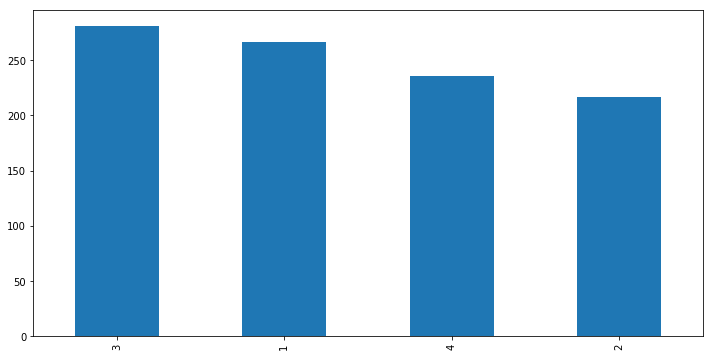

In [164]:
df['custcat'].value_counts ().plot.bar (figsize = (12,6))

In [165]:
bins = np.linspace (df.age.min (), df.age.max (),5)
labels = ['age_first', 'age_second', 'age_third', 'age_fourth']

df ['age_bins'] = pd.cut(df ['age'],bins,labels = labels, include_lowest = True)
df ['age_bins'] = df ['age_bins'].astype ('O')

In [166]:
bins = np.linspace (df.tenure.min (), df.tenure.max (),4)
labels = ['tenure_first', 'tenure_second', 'tenure_third']

df ['tenure_bins'] = pd.cut(df ['tenure'],bins,labels = labels, include_lowest = True)
df ['tenure_bins'] = df ['tenure_bins'].astype ('O')

In [167]:
bins = np.linspace (df.employ.min (), df.employ.max (),6)
labels = ['employ_first', 'employ_second', 'employ_third', 'employ_fourth', 'employ_fifth']

df ['employ_bins'] = pd.cut(df ['employ'],bins,labels = labels, include_lowest = True)
df ['employ_bins'] = df ['employ_bins'].astype ('O')

In [168]:
bins = [0,df ['income'].quantile (0.25), df ['income'].quantile (0.50), df ['income'].quantile (.75), df ['income'].quantile (1) ]
labels = ['income_first', 'income_second', 'income_third', 'income_fourth']

df ['income_bins'] = pd.cut(df ['income'],bins,labels = labels, include_lowest = True)
df ['income_bins'] = df ['income_bins'].astype ('O')

In [169]:
bins = [0,df ['address'].quantile (0.25), df ['address'].quantile (0.50), df ['address'].quantile (.75), df ['address'].quantile (1) ]
labels = ['address_first', 'address_second', 'address_third', 'address_fourth']

df ['address_bins'] = pd.cut(df ['address'],bins,labels = labels, include_lowest = True)
df ['address_bins'] = df ['address_bins'].astype ('O')

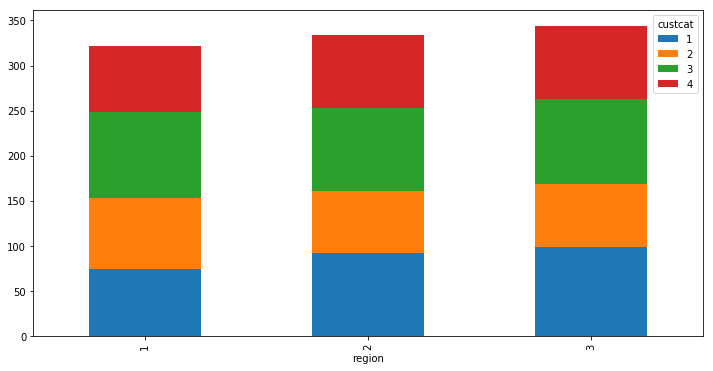

In [170]:
pd.crosstab (df['region'], df['custcat']).plot.bar (stacked = True, figsize = (12,6))

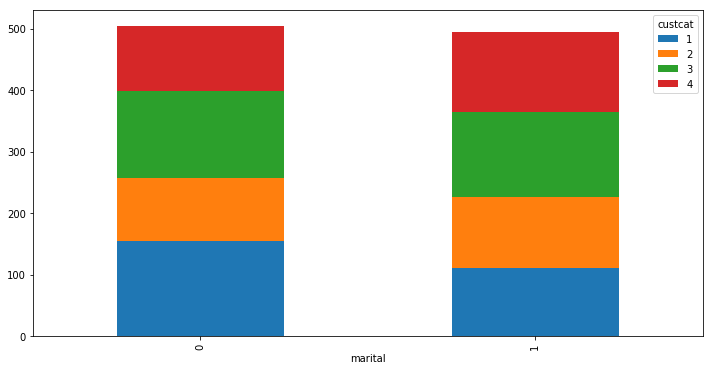

In [171]:
pd.crosstab (df['marital'], df['custcat']).plot.bar (stacked = True, figsize = (12,6))

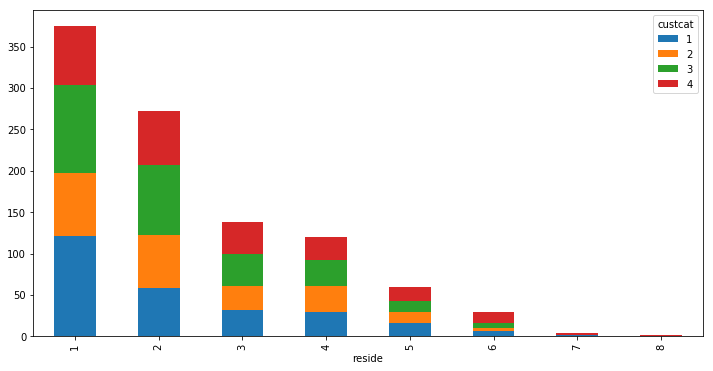

In [172]:
pd.crosstab (df['reside'], df['custcat']).plot.bar (stacked = True, figsize = (12,6))

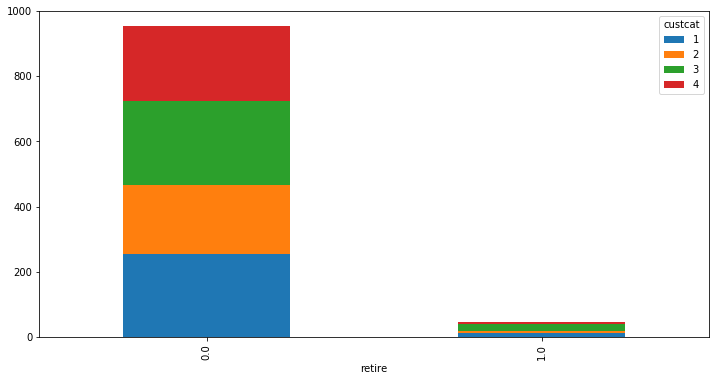

In [173]:
pd.crosstab (df['retire'], df['custcat']).plot.bar (stacked = True, figsize = (12,6))

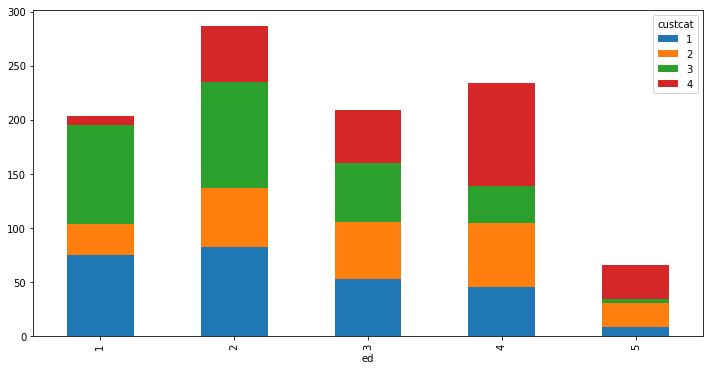

In [174]:
pd.crosstab (df['ed'], df['custcat']).plot.bar (stacked = True, figsize = (12,6))

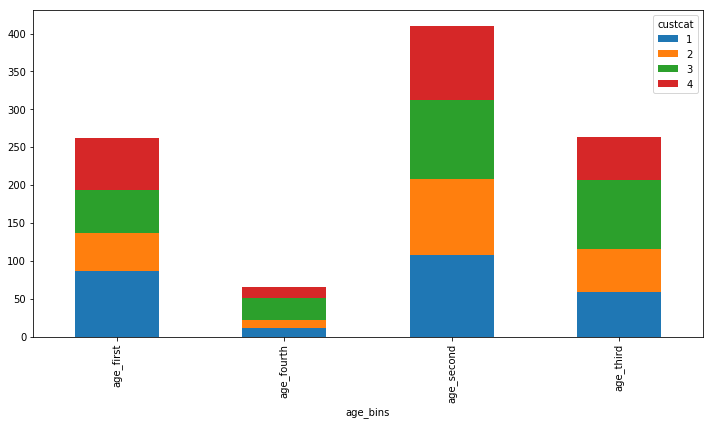

In [175]:
pd.crosstab (df['age_bins'], df['custcat']).plot.bar (stacked = True, figsize = (12,6))

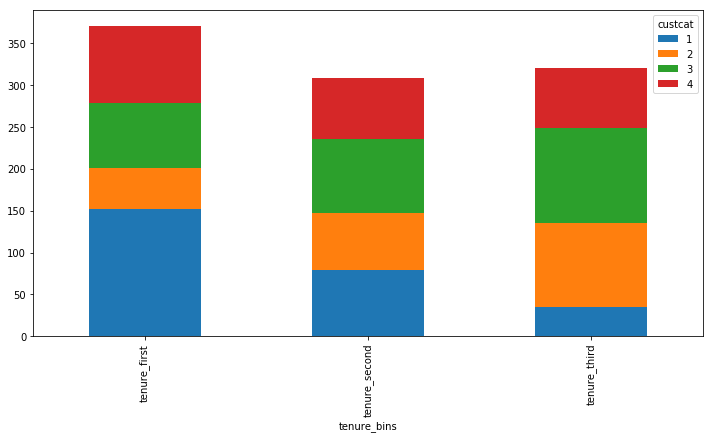

In [176]:
pd.crosstab (df['tenure_bins'], df['custcat']).plot.bar (stacked = True, figsize = (12,6))

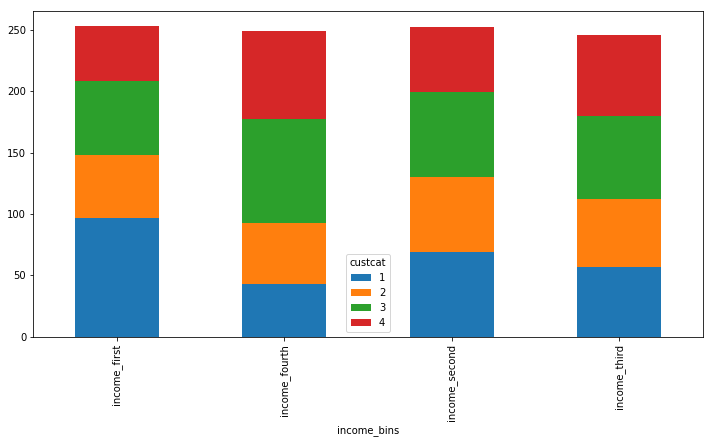

In [177]:
pd.crosstab (df['income_bins'], df['custcat']).plot.bar (stacked = True, figsize = (12,6))

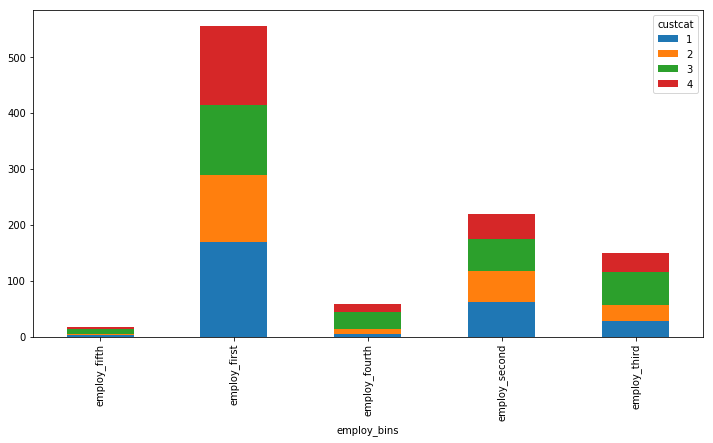

In [178]:
pd.crosstab (df['employ_bins'], df['custcat']).plot.bar (stacked = True, figsize = (12,6))

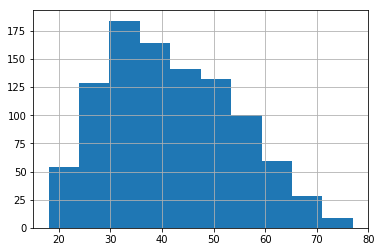

In [179]:
df.age.hist ()

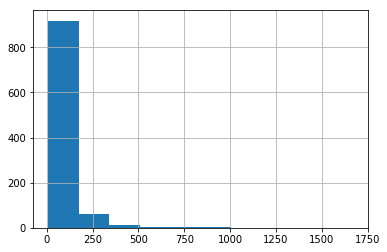

In [180]:
df.income.hist ()

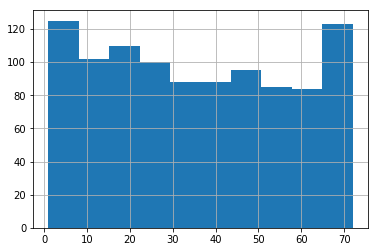

In [181]:
df ['tenure'].hist ()

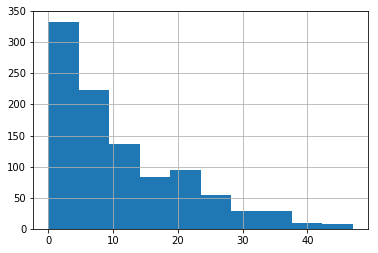

In [182]:
df ['employ'].hist ()

In [183]:
df.tail ()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat,age_bins,tenure_bins,employ_bins,income_bins,address_bins
995,3,10,39,0,0,27.0,3,0,0,1,3,1,age_second,tenure_first,employ_first,income_first,address_first
996,1,7,34,0,2,22.0,5,5,0,1,1,1,age_second,tenure_first,employ_first,income_first,address_first
997,3,67,59,0,40,944.0,5,33,0,1,1,4,age_third,tenure_third,employ_fourth,income_fourth,address_fourth
998,3,70,49,0,18,87.0,2,22,0,1,1,3,age_third,tenure_third,employ_third,income_fourth,address_third
999,3,50,36,1,7,39.0,3,3,0,1,3,2,age_second,tenure_third,employ_first,income_second,address_second


In [184]:
from sklearn.preprocessing import LabelEncoder

In [185]:
cols = ['region', 'marital', 'ed',
       'retire', 'gender', 'reside', 'age_bins',
       'tenure_bins', 'employ_bins', 'income_bins', 'address_bins']

In [186]:
for col in cols:
    df [col] = LabelEncoder ().fit_transform (df [col])

In [187]:
df ['age_tenure'] = df ['tenure']/ df ['age']

In [188]:
df.head ()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat,age_bins,tenure_bins,employ_bins,income_bins,address_bins,age_tenure
0,1,13,44,1,9,64.0,3,5,0,0,1,1,2,0,1,3,2,0.295455
1,2,11,33,1,7,136.0,4,5,0,0,5,4,2,0,1,1,2,0.333333
2,2,68,52,1,24,116.0,0,29,0,1,1,3,3,2,2,1,1,1.307692
3,1,33,33,0,12,33.0,1,0,0,1,0,1,2,1,1,2,3,1.000000
4,1,23,30,1,9,30.0,0,2,0,0,3,3,0,0,1,2,2,0.766667


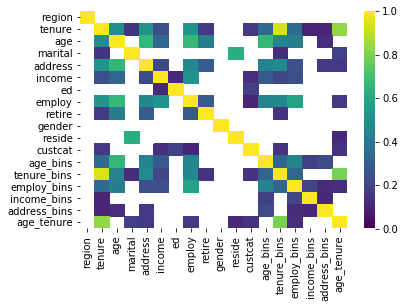

In [189]:
import seaborn as sns
sns.heatmap (abs (df.corr ()), cmap = 'viridis', mask = df.corr ()<0.1)

## Normalization

In [190]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [191]:
y = df ['custcat'].values
X = df.drop ('custcat', axis = 1).values

In [192]:
X = StandardScaler ().fit_transform (X)

In [193]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.30, random_state = 1)

### Modeling

In [194]:
from sklearn.neighbors import KNeighborsClassifier

In [195]:
# Training

KNN = KNeighborsClassifier (n_neighbors = 10, leaf_size=20,p=2 )

In [196]:
KNN.fit (X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [197]:
# Predicting

y_hat = KNN.predict (X_test)

## Accuracy evaluation 

In [198]:
from sklearn import metrics

In [199]:
print ('Testing accuracy : {}'.format (metrics.accuracy_score (y_test, y_hat)))

Testing accuracy : 0.38


In [200]:
print ('Training accuracy : {}'.format (metrics.accuracy_score (y_train, KNN.predict (X_train))))

Training accuracy : 0.51


In [201]:
Dict = {}
for k in range (1,150):
    y_hat = KNeighborsClassifier (k).fit (X_train, y_train).predict (X_test)
    Acc = metrics.accuracy_score (y_test, y_hat)
    Dict.update ({k:Acc})

In [202]:
Met = pd.Series (Dict)

Text(0.5, 0, 'KNN')

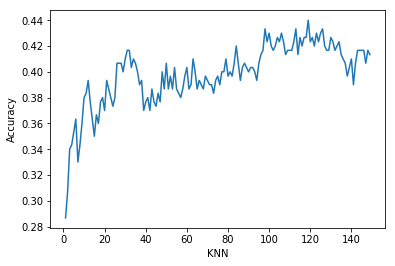

In [203]:
plt.plot (Met)
plt.ylabel ('Accuracy')
plt.xlabel ('KNN')

In [204]:
KNNs = KNeighborsClassifier (120)

In [205]:
ys_hat = KNNs.fit (X_train, y_train).predict (X_test)

In [206]:
metrics.accuracy_score (y_test, ys_hat)

0.42333333333333334

In [207]:
from sklearn.metrics import confusion_matrix, classification_report

In [208]:
print (confusion_matrix (ys_hat, y_test))

[[59 14 24 28]
 [ 8 13  9 11]
 [19 17 42 19]
 [ 4 15  5 13]]


In [209]:
print (classification_report (ys_hat, y_test))

              precision    recall  f1-score   support

           1       0.66      0.47      0.55       125
           2       0.22      0.32      0.26        41
           3       0.53      0.43      0.47        97
           4       0.18      0.35      0.24        37

   micro avg       0.42      0.42      0.42       300
   macro avg       0.40      0.39      0.38       300
weighted avg       0.50      0.42      0.45       300



In [210]:
from sklearn.linear_model import LogisticRegression

In [211]:
LR = LogisticRegression (C = 0.001)

In [212]:
LR.fit (X_train, y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [213]:
y_lr = LR.predict (X_test)

In [214]:
print (confusion_matrix (y_lr, y_test))

[[58 12 25 25]
 [ 5 13  7  9]
 [22 14 40 16]
 [ 5 20  8 21]]


In [215]:
print (classification_report (y_lr, y_test))

              precision    recall  f1-score   support

           1       0.64      0.48      0.55       120
           2       0.22      0.38      0.28        34
           3       0.50      0.43      0.47        92
           4       0.30      0.39      0.34        54

   micro avg       0.44      0.44      0.44       300
   macro avg       0.42      0.42      0.41       300
weighted avg       0.49      0.44      0.46       300



In [216]:
metrics.accuracy_score (y_test, y_lr)

0.44

In [217]:
coef = LR.coef_[0]

In [218]:
coef.size

17

In [219]:
importances = pd.DataFrame (abs (coef), index = df.drop (['custcat'], axis = 1).columns, columns = ['weights'])

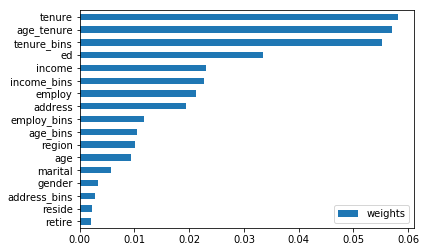

In [220]:
importances.sort_values (by = 'weights', ascending = True).plot.barh ()

In [221]:
from sklearn.ensemble import RandomForestClassifier

In [222]:
rf = RandomForestClassifier (max_depth = 5, n_estimators=1000, max_leaf_nodes=6)

In [223]:
rf.fit (X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=6,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [224]:
y_rf = rf.predict (X_test)

In [225]:
print (confusion_matrix (y_rf, y_test))

[[49 10 22 22]
 [ 4 10  5  5]
 [34 16 46 16]
 [ 3 23  7 28]]


In [226]:
print (classification_report (y_rf, y_test))

              precision    recall  f1-score   support

           1       0.54      0.48      0.51       103
           2       0.17      0.42      0.24        24
           3       0.57      0.41      0.48       112
           4       0.39      0.46      0.42        61

   micro avg       0.44      0.44      0.44       300
   macro avg       0.42      0.44      0.41       300
weighted avg       0.50      0.44      0.46       300



In [227]:
print (metrics.accuracy_score (y_rf, y_test))

0.44333333333333336


In [228]:
importances_rf =pd.DataFrame (rf.feature_importances_, index = df.drop ('custcat', axis = 1).columns, columns = ['weights'])

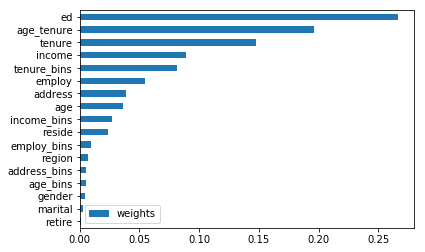

In [229]:
importances_rf.sort_values (by = 'weights', ascending = True).plot.barh ()